[← Previous: Topic Modeling with BERTopic](04_topic_modeling_byBERTopic.ipynb)

# **Dataset Comparison: Human vs AI Labels**

**Objective**: Compare human-labeled and GPT-3.5-turbo labeled datasets to identify key differences and potential areas of concern.

**Note**: This analysis does not assume human labels are superior - we're exploring differences objectively.



---


## Table of Contents

1. [Label Distribution Comparison](#1-label-distribution-comparison)
2. [Confidence and Consistency Analysis](#2-confidence-and-consistency-analysis)
3. [Subreddit-wise Comparison](#3-subreddit-wise-comparison)
4. [Edge Cases and Potential Issues](#4-edge-cases-and-potential-issues)

[Next: Text Classification with DistilBERT →](06_text_classification_byDistilBERT.ipynb)


---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load datasets
ai_df = pd.read_csv("../data/processed/simple_ai_labels.csv")
human_df = pd.read_csv("../data/processed/sample_human_labels.csv")

print(f"AI-labeled dataset: {len(ai_df):,} records")
print(f"Human-labeled dataset: {len(human_df):,} records")

AI-labeled dataset: 1,000 records
Human-labeled dataset: 599 records


---

## **1. Label Distribution Comparison**

**Key Question**: How do the two labeling approaches distribute anxiety classifications?


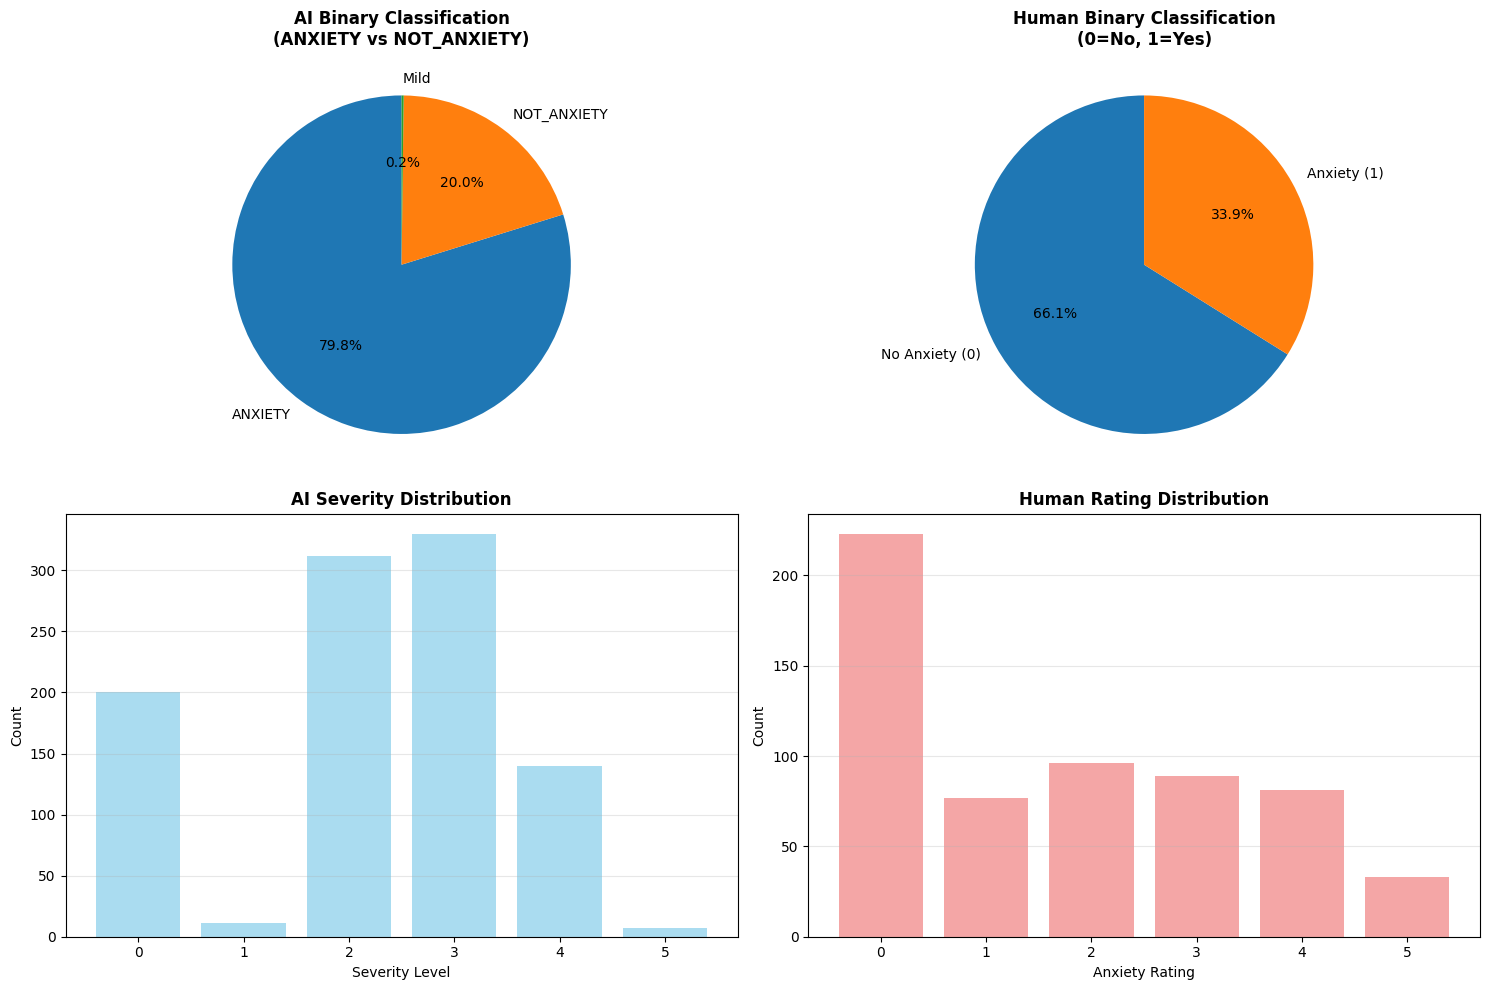

=== KEY DIFFERENCES ===
AI identifies 79.8% as anxiety cases
Human identifies 33.9% as anxiety cases
Difference: 45.9 percentage points

AI severity range: 0-5
Human rating range: 0-5
AI mean severity: 2.22
Human mean rating: 1.71


In [2]:
# Prepare data for comparison
# AI: binary (ANXIETY/NOT_ANXIETY) + severity (0-5)
# Human: anxiety_level (0/1) + anxiety_rating (0-5)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# AI Binary Classification
ai_binary = ai_df["ai_category"].value_counts()
ax1.pie(ai_binary.values, labels=ai_binary.index, autopct="%1.1f%%", startangle=90)
ax1.set_title("AI Binary Classification\n(ANXIETY vs NOT_ANXIETY)", fontweight="bold")

# Human Binary Classification
human_binary = human_df["anxiety_level"].value_counts()
human_labels = ["No Anxiety (0)", "Anxiety (1)"]
ax2.pie(human_binary.values, labels=human_labels, autopct="%1.1f%%", startangle=90)
ax2.set_title("Human Binary Classification\n(0=No, 1=Yes)", fontweight="bold")

# AI Severity Distribution
ai_severity = ai_df["ai_severity"].value_counts().sort_index()
ax3.bar(ai_severity.index, ai_severity.values, alpha=0.7, color="skyblue")
ax3.set_title("AI Severity Distribution", fontweight="bold")
ax3.set_xlabel("Severity Level")
ax3.set_ylabel("Count")
ax3.grid(axis="y", alpha=0.3)

# Human Rating Distribution
human_rating = human_df["anxiety_rating"].value_counts().sort_index()
ax4.bar(human_rating.index, human_rating.values, alpha=0.7, color="lightcoral")
ax4.set_title("Human Rating Distribution", fontweight="bold")
ax4.set_xlabel("Anxiety Rating")
ax4.set_ylabel("Count")
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("=== KEY DIFFERENCES ===")
ai_anxiety_rate = (ai_df["ai_category"] == "ANXIETY").mean() * 100
human_anxiety_rate = human_df["anxiety_level"].mean() * 100

print(f"AI identifies {ai_anxiety_rate:.1f}% as anxiety cases")
print(f"Human identifies {human_anxiety_rate:.1f}% as anxiety cases")
print(f"Difference: {abs(ai_anxiety_rate - human_anxiety_rate):.1f} percentage points")

print(f"\nAI severity range: {ai_df['ai_severity'].min()}-{ai_df['ai_severity'].max()}")
print(
    f"Human rating range: {human_df['anxiety_rating'].min()}-{human_df['anxiety_rating'].max()}"
)
print(f"AI mean severity: {ai_df['ai_severity'].mean():.2f}")
print(f"Human mean rating: {human_df['anxiety_rating'].mean():.2f}")

---

## **2. Confidence and Consistency Analysis**

**Key Question**: How confident is AI in its predictions, and how does this relate to severity levels?


/var/folders/bc/lrkcgdlx3332x9brp_np1l_c0000gn/T/ipykernel_11763/3076777904.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([anxiety_conf, no_anxiety_conf], labels=["ANXIETY", "NOT_ANXIETY"])


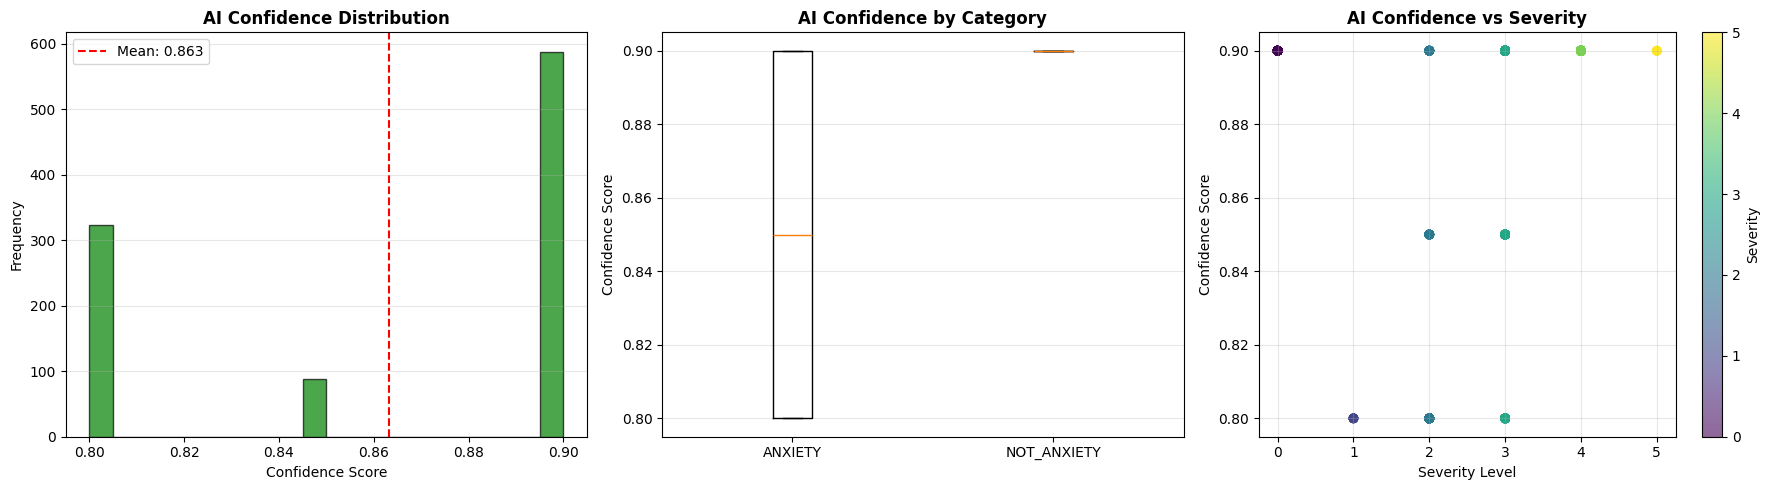

=== CONFIDENCE INSIGHTS ===
AI confidence range: 0.80 - 0.90
Mean confidence for ANXIETY: 0.854
Mean confidence for NOT_ANXIETY: 0.900

Cases with confidence < 0.85: 324 (32.4%)
Correlation between confidence and severity: -0.004


In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# AI Confidence Distribution
ax1.hist(ai_df["ai_confidence"], bins=20, alpha=0.7, color="green", edgecolor="black")
ax1.set_title("AI Confidence Distribution", fontweight="bold")
ax1.set_xlabel("Confidence Score")
ax1.set_ylabel("Frequency")
ax1.axvline(
    ai_df["ai_confidence"].mean(),
    color="red",
    linestyle="--",
    label=f'Mean: {ai_df["ai_confidence"].mean():.3f}',
)
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Confidence by Category
anxiety_conf = ai_df[ai_df["ai_category"] == "ANXIETY"]["ai_confidence"]
no_anxiety_conf = ai_df[ai_df["ai_category"] == "NOT_ANXIETY"]["ai_confidence"]

ax2.boxplot([anxiety_conf, no_anxiety_conf], labels=["ANXIETY", "NOT_ANXIETY"])
ax2.set_title("AI Confidence by Category", fontweight="bold")
ax2.set_ylabel("Confidence Score")
ax2.grid(axis="y", alpha=0.3)

# Confidence vs Severity Scatter
scatter = ax3.scatter(
    ai_df["ai_severity"],
    ai_df["ai_confidence"],
    alpha=0.6,
    c=ai_df["ai_severity"],
    cmap="viridis",
)
ax3.set_title("AI Confidence vs Severity", fontweight="bold")
ax3.set_xlabel("Severity Level")
ax3.set_ylabel("Confidence Score")
plt.colorbar(scatter, ax=ax3, label="Severity")
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Key insights
print("=== CONFIDENCE INSIGHTS ===")
print(
    f"AI confidence range: {ai_df['ai_confidence'].min():.2f} - {ai_df['ai_confidence'].max():.2f}"
)
print(f"Mean confidence for ANXIETY: {anxiety_conf.mean():.3f}")
print(f"Mean confidence for NOT_ANXIETY: {no_anxiety_conf.mean():.3f}")

# Low confidence cases
low_conf_threshold = 0.85
low_conf_cases = ai_df[ai_df["ai_confidence"] < low_conf_threshold]
print(
    f"\nCases with confidence < {low_conf_threshold}: {len(low_conf_cases)} ({len(low_conf_cases)/len(ai_df)*100:.1f}%)"
)

# Correlation between confidence and severity
correlation = ai_df["ai_confidence"].corr(ai_df["ai_severity"])
print(f"Correlation between confidence and severity: {correlation:.3f}")

---

## **3: Subreddit-wise Comparison**

**Key Question**: Do AI and human labelers show different patterns across subreddits?


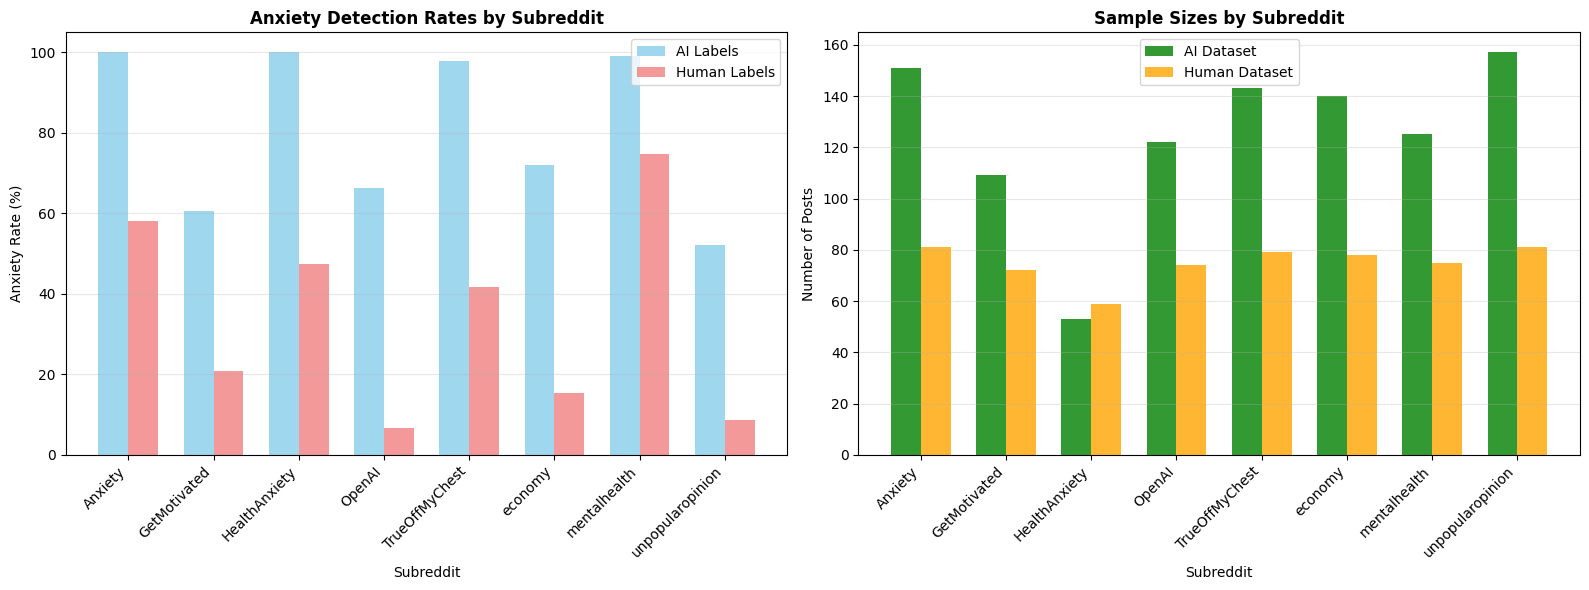

=== SUBREDDIT COMPARISON ===
                  AI_Anxiety_Rate_%  AI_Mean_Severity  AI_Count  \
subreddit                                                         
Anxiety                       100.0               3.1       151   
GetMotivated                   60.6               1.4       109   
HealthAnxiety                 100.0               2.9        53   
OpenAI                         66.4               1.5       122   
TrueOffMyChest                 97.9               3.1       143   
economy                        72.1               1.7       140   
mentalhealth                   99.2               3.2       125   
unpopularopinion               52.2               1.1       157   

                  Human_Anxiety_Rate_%  Human_Mean_Rating  Human_Count  
subreddit                                                               
Anxiety                           58.0                2.5           81  
GetMotivated                      20.8                1.2           72  
HealthAn

In [4]:
# Calculate anxiety rates by subreddit for both datasets
ai_subreddit_stats = (
    ai_df.groupby("subreddit")
    .agg(
        {
            "ai_category": lambda x: (x == "ANXIETY").mean() * 100,
            "ai_severity": "mean",
            "post_id": "count",
        }
    )
    .round(2)
)
ai_subreddit_stats.columns = ["AI_Anxiety_Rate_%", "AI_Mean_Severity", "AI_Count"]

human_subreddit_stats = (
    human_df.groupby("subreddit")
    .agg(
        {
            "anxiety_level": lambda x: x.mean() * 100,
            "anxiety_rating": "mean",
            "post_id": "count",
        }
    )
    .round(2)
)
human_subreddit_stats.columns = [
    "Human_Anxiety_Rate_%",
    "Human_Mean_Rating",
    "Human_Count",
]

# Merge for comparison
comparison = pd.merge(
    ai_subreddit_stats,
    human_subreddit_stats,
    left_index=True,
    right_index=True,
    how="outer",
).fillna(0)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Anxiety rates comparison
subreddits = comparison.index
x_pos = np.arange(len(subreddits))
width = 0.35

bars1 = ax1.bar(
    x_pos - width / 2,
    comparison["AI_Anxiety_Rate_%"],
    width,
    label="AI Labels",
    alpha=0.8,
    color="skyblue",
)
bars2 = ax1.bar(
    x_pos + width / 2,
    comparison["Human_Anxiety_Rate_%"],
    width,
    label="Human Labels",
    alpha=0.8,
    color="lightcoral",
)

ax1.set_title("Anxiety Detection Rates by Subreddit", fontweight="bold")
ax1.set_xlabel("Subreddit")
ax1.set_ylabel("Anxiety Rate (%)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(subreddits, rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Sample size comparison
bars3 = ax2.bar(
    x_pos - width / 2,
    comparison["AI_Count"],
    width,
    label="AI Dataset",
    alpha=0.8,
    color="green",
)
bars4 = ax2.bar(
    x_pos + width / 2,
    comparison["Human_Count"],
    width,
    label="Human Dataset",
    alpha=0.8,
    color="orange",
)

ax2.set_title("Sample Sizes by Subreddit", fontweight="bold")
ax2.set_xlabel("Subreddit")
ax2.set_ylabel("Number of Posts")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(subreddits, rotation=45, ha="right")
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Display comparison table
print("=== SUBREDDIT COMPARISON ===")
print(comparison.round(1))

# Calculate differences
comparison["Rate_Difference"] = (
    comparison["AI_Anxiety_Rate_%"] - comparison["Human_Anxiety_Rate_%"]
)
print("\n=== LARGEST DIFFERENCES ===")
print("Subreddits where AI and Human differ most:")
print(
    comparison[
        ["AI_Anxiety_Rate_%", "Human_Anxiety_Rate_%", "Rate_Difference"]
    ].sort_values("Rate_Difference", key=abs, ascending=False)
)

---

## **Step 4: Edge Cases and Potential Issues**

**Key Question**: What are the potential problem areas that need attention?


In [5]:
# Find overlapping posts for direct comparison
common_posts = set(ai_df["post_id"]) & set(human_df["post_id"])
print(f"=== OVERLAPPING POSTS ANALYSIS ===")
print(f"Posts in both datasets: {len(common_posts)}")

if len(common_posts) > 0:
    # Create merged dataframe for overlapping posts
    ai_subset = ai_df[ai_df["post_id"].isin(common_posts)][
        ["post_id", "ai_category", "ai_severity", "ai_confidence", "subreddit", "title"]
    ]
    human_subset = human_df[human_df["post_id"].isin(common_posts)][
        ["post_id", "anxiety_level", "anxiety_rating"]
    ]

    # Merge on post_id
    merged = pd.merge(ai_subset, human_subset, on="post_id", how="inner")

    # Convert to binary for comparison
    merged["ai_binary"] = (merged["ai_category"] == "ANXIETY").astype(int)
    merged["human_binary"] = merged["anxiety_level"].astype(int)

    # Agreement analysis
    agreement = (merged["ai_binary"] == merged["human_binary"]).mean()
    print(f"Agreement rate on overlapping posts: {agreement:.2%}")

    # Disagreement cases
    disagreements = merged["ai_binary"] != merged["human_binary"]
    print(f"Disagreement cases: {disagreements.sum()} out of {len(merged)}")

    if disagreements.sum() > 0:
        print("\nSample disagreement cases:")
        disagree_cases = merged[disagreements].head(3)
        for _, row in disagree_cases.iterrows():
            print(f"\nPost ID: {row['post_id']}")
            print(f"Subreddit: {row['subreddit']}")
            print(
                f"AI: {row['ai_category']} (severity: {row['ai_severity']}, conf: {row['ai_confidence']:.3f})"
            )
            print(
                f"Human: {'ANXIETY' if row['human_binary'] == 1 else 'NOT_ANXIETY'} (rating: {row['anxiety_rating']})"
            )
            print(f"Title: {row['title'][:100]}...")
else:
    print("No overlapping posts found between datasets.")

# Identify potential edge cases in AI dataset
print("\n=== AI EDGE CASES ===")

# Low confidence high severity cases
edge_case1 = ai_df[(ai_df["ai_confidence"] < 0.8) & (ai_df["ai_severity"] >= 4)]
print(f"Low confidence (<0.8) but high severity (≥4): {len(edge_case1)} cases")

# High confidence but low severity anxiety cases
edge_case2 = ai_df[
    (ai_df["ai_confidence"] > 0.9)
    & (ai_df["ai_severity"] <= 1)
    & (ai_df["ai_category"] == "ANXIETY")
]
print(f"High confidence (>0.9) but low severity (≤1) anxiety: {len(edge_case2)} cases")

# NOT_ANXIETY with high severity scores
edge_case3 = ai_df[(ai_df["ai_category"] == "NOT_ANXIETY") & (ai_df["ai_severity"] > 2)]
print(f"NOT_ANXIETY but severity >2: {len(edge_case3)} cases")

# Human edge cases
print("\n=== HUMAN EDGE CASES ===")

# No anxiety but high rating
human_edge1 = human_df[
    (human_df["anxiety_level"] == 0) & (human_df["anxiety_rating"] > 2)
]
print(f"No anxiety (level=0) but rating >2: {len(human_edge1)} cases")

# Anxiety but zero rating
human_edge2 = human_df[
    (human_df["anxiety_level"] == 1) & (human_df["anxiety_rating"] == 0)
]
print(f"Anxiety (level=1) but rating=0: {len(human_edge2)} cases")

# Summary of key concerns
print("\n=== KEY AREAS OF CONCERN ===")
print("1. Label Distribution: AI and human show different anxiety detection rates")
print("2. Confidence Issues: Some AI predictions have low confidence scores")
print("3. Subreddit Bias: Different patterns across subreddits between labelers")
print("4. Edge Cases: Inconsistent severity/confidence relationships in both datasets")

# Create summary statistics table
summary_stats = pd.DataFrame(
    {
        "Metric": [
            "Total Posts",
            "Anxiety Rate (%)",
            "Mean Severity/Rating",
            "Std Severity/Rating",
        ],
        "AI Dataset": [
            len(ai_df),
            f"{(ai_df['ai_category'] == 'ANXIETY').mean()*100:.1f}",
            f"{ai_df['ai_severity'].mean():.2f}",
            f"{ai_df['ai_severity'].std():.2f}",
        ],
        "Human Dataset": [
            len(human_df),
            f"{human_df['anxiety_level'].mean()*100:.1f}",
            f"{human_df['anxiety_rating'].mean():.2f}",
            f"{human_df['anxiety_rating'].std():.2f}",
        ],
    }
)

print("\n=== SUMMARY STATISTICS ===")
print(summary_stats.to_string(index=False))

=== OVERLAPPING POSTS ANALYSIS ===
Posts in both datasets: 593
Agreement rate on overlapping posts: 51.60%
Disagreement cases: 287 out of 593

Sample disagreement cases:

Post ID: 1mbrx29
Subreddit: GetMotivated
AI: ANXIETY (severity: 2, conf: 0.800)
Human: NOT_ANXIETY (rating: 0)
Title: [text] for anyone and everyone feeling low, insecure , sad , afraid....

Post ID: 1ndzul9
Subreddit: TrueOffMyChest
AI: ANXIETY (severity: 3, conf: 0.900)
Human: NOT_ANXIETY (rating: 0)
Title: i'm embarrassed to be a 29 year old who has never kissed anyone...

Post ID: 1nijfxd
Subreddit: OpenAI
AI: ANXIETY (severity: 2, conf: 0.800)
Human: NOT_ANXIETY (rating: 0)
Title: did they remove legacy models from plus again?...

=== AI EDGE CASES ===
Low confidence (<0.8) but high severity (≥4): 0 cases
High confidence (>0.9) but low severity (≤1) anxiety: 0 cases
NOT_ANXIETY but severity >2: 0 cases

=== HUMAN EDGE CASES ===
No anxiety (level=0) but rating >2: 0 cases
Anxiety (level=1) but rating=0: 0 cases

=


[Next: Text Classification with DistilBERT →](06_text_classification_byDistilBERT.ipynb)